# Compare prediction

In [1]:
import sys
sys.path.insert(0,"/home/gridsan/hwpang/Software/RMG-Py/")
sys.path.insert(0,"..")

import json
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import string
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

from tree.parameters import Ts
from tree.utils import markers

# Load test results on radicals

In [2]:
hbi_unc_df = pd.read_csv("../data/hbi_unc.csv")

with open("../data/splits/random.json", "r") as f:
    train_inds, test_inds = json.load(f)

test_df = hbi_unc_df.loc[test_inds, :]
test_df = test_df.reset_index(drop=True)

radical_data_df = pd.read_csv("../data/radical_data_no_dup.csv")
radical_gav_df = pd.read_csv("../data/radical_gav.csv")

test_radical_data_df = radical_data_df[radical_data_df["smiles"].isin(test_df["radical_smiles"])]
test_radical_data_df = test_radical_data_df.reset_index(drop=True)
test_radical_gav_df = radical_gav_df[radical_gav_df["smiles"].isin(test_df["radical_smiles"])]
test_radical_gav_df = test_radical_gav_df.reset_index(drop=True)

test_radical_sidt_df = pd.read_csv("../models/split-random_run-aleatoric-prepruning-bounded/frac-1.0/test_radical.csv")
test_radical_sidt_df

,radical_smiles,H298 (kcal/mol),S298 (cal/mol/K),Cp300 (cal/mol/K),Cp400 (cal/mol/K),Cp500 (cal/mol/K),Cp600 (cal/mol/K),Cp800 (cal/mol/K),Cp1000 (cal/mol/K),Cp1500 (cal/mol/K),comment
0,[O]C(=O)OC(=O)O,-175.469790,84.080735,28.387505,32.570774,35.109357,37.022046,38.764725,39.088809,37.903059,Thermo group additivity estimation: group(O2s-...
1,CC(=O)COC(O[O])OC(C)=O,-154.665989,136.091115,46.739279,54.819261,63.001727,70.410243,82.184670,90.456302,101.195359,Thermo group additivity estimation: group(O2s-...
2,[O]OC(=O)OC(=O)O,-157.909442,89.385512,30.946395,36.115151,39.108763,41.152616,43.540604,44.565908,44.806515,Thermo group additivity estimation: group(O2s-...
3,C[C]1OC(=O)C(O)(C=O)O1,-150.746878,105.055268,35.291629,42.054000,48.043727,52.899268,60.321924,65.427980,74.486164,Thermo group additivity estimation: group(O2s-...
4,CC1(OO)COC(O[O])C(=O)O1,-150.961919,113.884440,44.539402,54.401531,62.841256,69.748021,79.748154,87.092306,91.956598,Thermo group additivity estimation: group(O2s-...
...,...,...,...,...,...,...,...,...,...,...,...
216,C#CO[O],84.633200,66.491500,16.333070,17.692460,18.723320,20.191470,21.497960,22.683580,24.029860,Thermo group additivity estimation: group(O2s-...
217,C#CC1([CH2])OO1,94.792503,74.852134,24.739330,28.403061,31.770237,34.727700,39.093821,41.615044,45.844790,Thermo group additivity estimation: group(O2s-...
218,C#CCC=[C]C,114.642000,86.334001,26.238500,32.204680,37.446290,41.734100,48.393150,53.313020,60.927300,Thermo group additivity estimation: group(Cs-(...
219,CC=C=C1[CH]C1,100.786300,82.960441,26.157855,32.629386,37.875480,42.390960,49.300100,54.344870,62.182620,Thermo group additivity estimation: group(Cs-(...


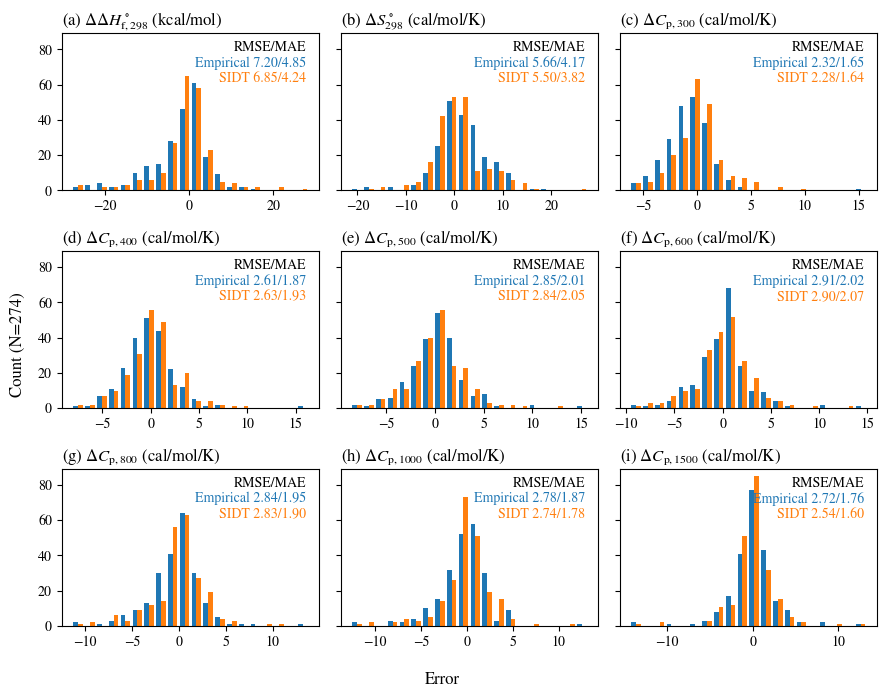

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
bins = 20

ax = axs.flat[0]
label = "H298 (kcal/mol)"
true_ys = test_radical_data_df[label]
pred_ys = test_radical_gav_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_radical_data_df[label]
pred_ys = test_radical_sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.annotate("RMSE/MAE", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction")
ax.annotate("\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C0")
ax.annotate("\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C1")
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
label = "S298 (cal/mol/K)"
true_ys = test_radical_data_df[label]
pred_ys = test_radical_gav_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_radical_data_df[label]
pred_ys = test_radical_sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.annotate("RMSE/MAE", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction")
ax.annotate("\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C0")
ax.annotate("\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C1")
ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    label = f"Cp{T} (cal/mol/K)"
    true_ys = test_radical_data_df[label]
    pred_ys = test_radical_gav_df[label]
    empirical_errors = pred_ys - true_ys
    empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    empirical_mae = mean_absolute_error(true_ys, pred_ys)

    true_ys = test_radical_data_df[label]
    pred_ys = test_radical_sidt_df[label]
    sidt_errors = pred_ys - true_ys
    sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    sidt_mae = mean_absolute_error(true_ys, pred_ys)

    ax.hist([empirical_errors, sidt_errors], bins=bins)
    ax.annotate("RMSE/MAE", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction")
    ax.annotate("\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C0")
    ax.annotate("\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C1")
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Count (N={len(test_df.index)})")
fig.supxlabel(f"Error")

fig.tight_layout()
fig.savefig("../figures/radical_empirical_vs_sidt_error_hist.pdf", bbox_inches="tight")


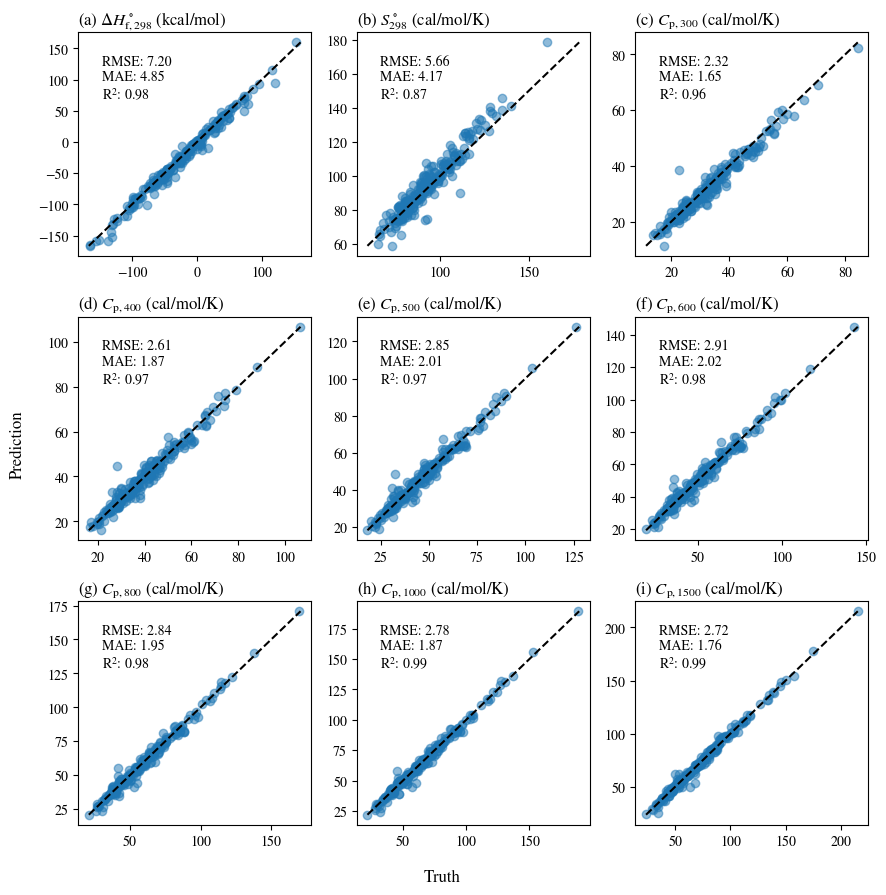

In [3]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_radical_data_df["H298 (kcal/mol)"]
pred_ys = test_radical_gav_df["H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_radical_data_df["S298 (cal/mol/K)"]
pred_ys = test_radical_gav_df["S298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_radical_data_df[f"Cp{T} (cal/mol/K)"]
    pred_ys = test_radical_gav_df[f"Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/radical_empirical_parity.pdf", bbox_inches="tight")

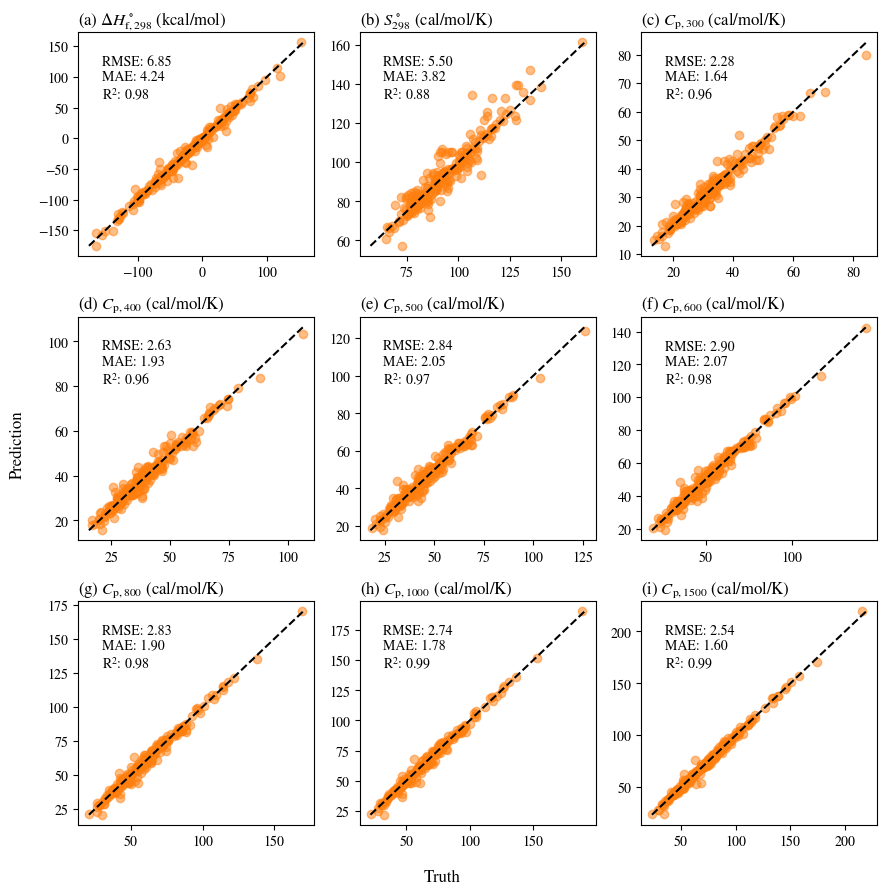

In [23]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_radical_data_df["H298 (kcal/mol)"]
pred_ys = test_radical_sidt_df["H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5, color="C1")
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_radical_data_df["S298 (cal/mol/K)"]
pred_ys = test_radical_sidt_df["S298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5, color="C1")
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_radical_data_df[f"Cp{T} (cal/mol/K)"]
    pred_ys = test_radical_sidt_df[f"Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5, color="C1")
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/radical_sidt_parity.pdf", bbox_inches="tight")

# Load test results on HBI

In [5]:
hbi_unc_df = pd.read_csv("../data/hbi_unc.csv")

with open("../data/splits/random.json", "r") as f:
    train_inds, test_inds = json.load(f)

test_df = hbi_unc_df.loc[test_inds, :]
test_df = test_df.reset_index(drop=True)
empirical_df = pd.read_csv("../data/hbi_prediction_empirical.csv")
empirical_df = empirical_df.loc[test_inds, :]
empirical_df = empirical_df.reset_index(drop=True)

In [6]:
sidt_df = pd.read_csv("../models/split-random_run-aleatoric-prepruning-bounded/frac-1.0/test.csv")
empirical_retrained_df = pd.read_csv("../models/split-random_run-retrain-empirical/test.csv")

# Plot: error distribution

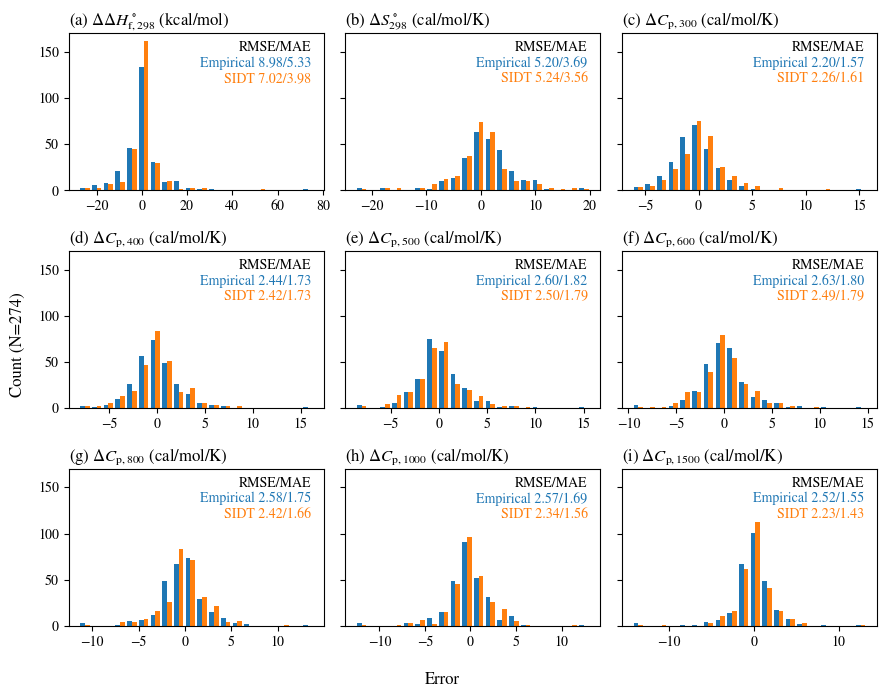

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
bins = 20

ax = axs.flat[0]
label = "HBI_H298 (kcal/mol)"
true_ys = test_df[label]
pred_ys = empirical_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.annotate("RMSE/MAE", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction")
ax.annotate("\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C0")
ax.annotate("\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C1")
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
label = "HBI_Sint298 (cal/mol/K)"
true_ys = test_df[label]
pred_ys = empirical_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.annotate("RMSE/MAE", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction")
ax.annotate("\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C0")
ax.annotate("\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C1")
ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    label = f"HBI_Cp{T} (cal/mol/K)"
    true_ys = test_df[label]
    pred_ys = empirical_df[label]
    empirical_errors = pred_ys - true_ys
    empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    empirical_mae = mean_absolute_error(true_ys, pred_ys)

    true_ys = test_df[label]
    pred_ys = sidt_df[label]
    sidt_errors = pred_ys - true_ys
    sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    sidt_mae = mean_absolute_error(true_ys, pred_ys)

    ax.hist([empirical_errors, sidt_errors], bins=bins)
    ax.annotate("RMSE/MAE", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction")
    ax.annotate("\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C0")
    ax.annotate("\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C1")
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Count (N={len(test_df.index)})")
fig.supxlabel(f"Error")

fig.tight_layout()
fig.savefig("../figures/empirical_vs_sidt_error_hist.pdf", bbox_inches="tight")

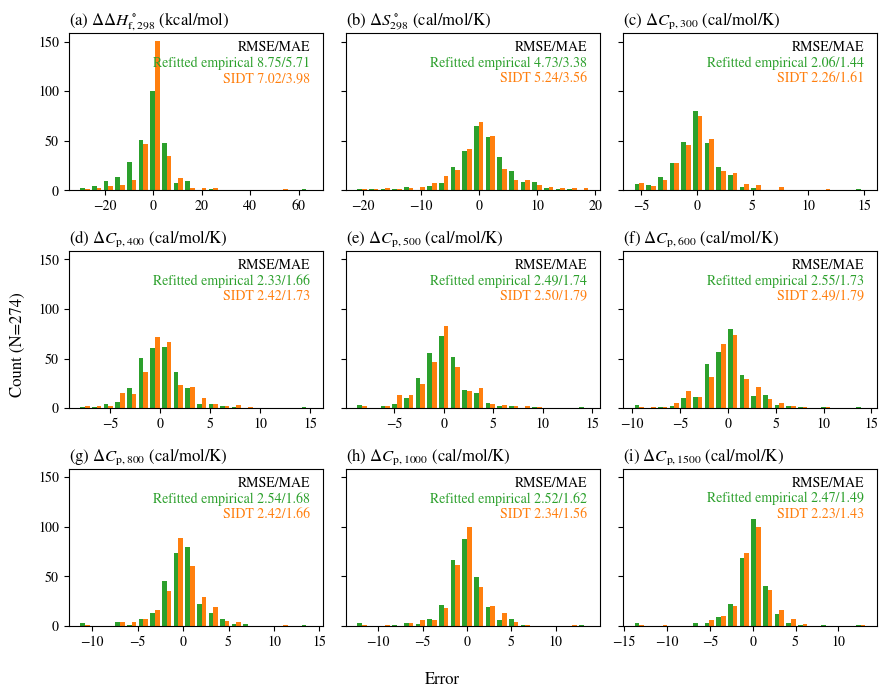

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
bins = 20

ax = axs.flat[0]
label = "HBI_H298 (kcal/mol)"
true_ys = test_df[label]
pred_ys = empirical_retrained_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins, color=["C2", "C1"])
ax.annotate("RMSE/MAE", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction")
ax.annotate("\n"+f"Refitted empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C2")
ax.annotate("\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C1")
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
label = "HBI_Sint298 (cal/mol/K)"
true_ys = test_df[label]
pred_ys = empirical_retrained_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins, color=["C2", "C1"])
ax.annotate("RMSE/MAE", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction")
ax.annotate("\n"+f"Refitted empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C2")
ax.annotate("\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C1")
ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    label = f"HBI_Cp{T} (cal/mol/K)"
    true_ys = test_df[label]
    pred_ys = empirical_retrained_df[label]
    empirical_errors = pred_ys - true_ys
    empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    empirical_mae = mean_absolute_error(true_ys, pred_ys)

    true_ys = test_df[label]
    pred_ys = sidt_df[label]
    sidt_errors = pred_ys - true_ys
    sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    sidt_mae = mean_absolute_error(true_ys, pred_ys)

    ax.hist([empirical_errors, sidt_errors], bins=bins, color=["C2", "C1"])
    ax.annotate("RMSE/MAE", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction")
    ax.annotate("\n"+f"Refitted empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C2")
    ax.annotate("\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", (0.95, 0.95), ha="right", va="top", xycoords="axes fraction", color="C1")
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Count (N={len(test_df.index)})")
fig.supxlabel(f"Error")

fig.tight_layout()
fig.savefig("../figures/empirical_retrained_vs_sidt_error_hist.pdf", bbox_inches="tight")

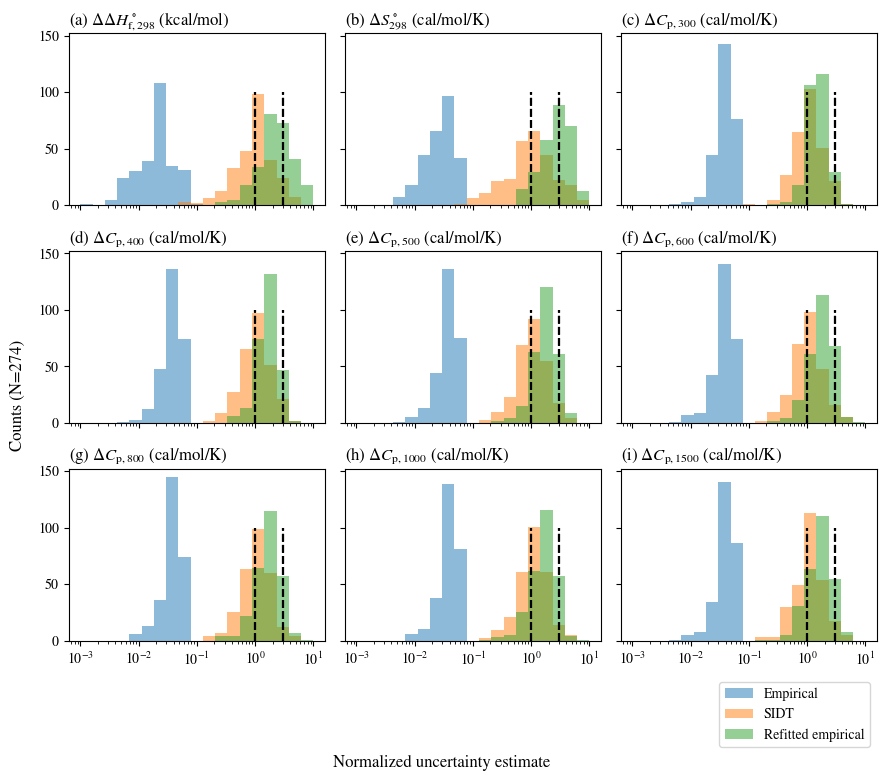

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, sharex=True, figsize=(9, 8))

colors = {
    "Empirical": plt.get_cmap("tab20")(0),
    "SIDT": plt.get_cmap("tab20")(2),
    "Refitted empirical": plt.get_cmap("tab20")(1),
}
counter = 0

for df_i, (temp_df, df_label) in enumerate(zip([empirical_df, sidt_df, empirical_retrained_df, ], ["Empirical", "SIDT", "Refitted empirical", ])):
        
        ax = axs.flat[0]
        label = "HBI_H298 (kcal/mol)"
        true_ys = test_df[label].values
        data_uncs = test_df["unc_"+label].values
        pred_ys = temp_df[label].values
        pred_uncs = temp_df["unc_"+label].values
        true_errs = np.abs(pred_ys - true_ys)
        if df_label == "Empirical":
            pred_uncs[pred_uncs==0.0] = 0.1
        xs = pred_uncs / np.sqrt(true_errs**2 + data_uncs**2)
        # xs = pred_uncs / true_errs
        logbins = np.geomspace(1e-3, 1e1, 20)
        ax.hist(xs, bins=logbins, alpha=0.5, label=df_label)
        ax.vlines(x=3, ymin=0, ymax=100, linestyle="--", color="k")
        ax.vlines(x=1, ymin=0, ymax=100, linestyle="--", color="k")
        ax.set_xscale("log")
        ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

        ax = axs.flat[1]
        label = "HBI_Sint298 (cal/mol/K)"
        true_ys = test_df[label]
        data_uncs = test_df["unc_"+label].values
        pred_ys = temp_df[label]
        pred_uncs = temp_df["unc_"+label].values
        true_errs = np.abs(pred_ys - true_ys)
        if df_label == "Empirical":
            pred_uncs[pred_uncs==0.0] = 0.1
        xs = pred_uncs / np.sqrt(true_errs**2 + data_uncs**2)
        # xs = pred_uncs / true_errs
        logbins = np.geomspace(1e-3, 1e1, 20)
        ax.hist(xs, bins=logbins, alpha=0.5, label=df_label)
        ax.vlines(x=3, ymin=0, ymax=100, linestyle="--", color="k")
        ax.vlines(x=1, ymin=0, ymax=100, linestyle="--", color="k")
        ax.set_xscale("log")
        ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

        for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
            label = f"HBI_Cp{T} (cal/mol/K)"
            true_ys = test_df[label]
            data_uncs = test_df["unc_"+label].values
            pred_ys = temp_df[label]
            pred_uncs = temp_df["unc_"+label].values
            true_errs = np.abs(pred_ys - true_ys)
            if df_label == "Empirical":
                pred_uncs[pred_uncs==0.0] = 0.1
            xs = pred_uncs / np.sqrt(true_errs**2 + data_uncs**2)
            # xs = pred_uncs / true_errs
            logbins = np.geomspace(1e-3, 1e1, 20)
            ax.hist(xs, bins=logbins, alpha=0.5, label=df_label)
            ax.vlines(x=3, ymin=0, ymax=100, linestyle="--", color="k")
            ax.vlines(x=1, ymin=0, ymax=100, linestyle="--", color="k")
            ax.set_xscale("log")
            ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")
            
        counter += 1

axs.flat[-1].legend(bbox_to_anchor=(1.0, -0.2))
fig.supylabel("Counts "+f"(N={len(test_df.index)})")
fig.supxlabel("Normalized uncertainty estimate", y=0.03)
fig.tight_layout()

fig.savefig("../figures/unc_div_true_error_vs_true_error_sidt_vs_empirical_finetuned_empirical.pdf", bbox_inches="tight")

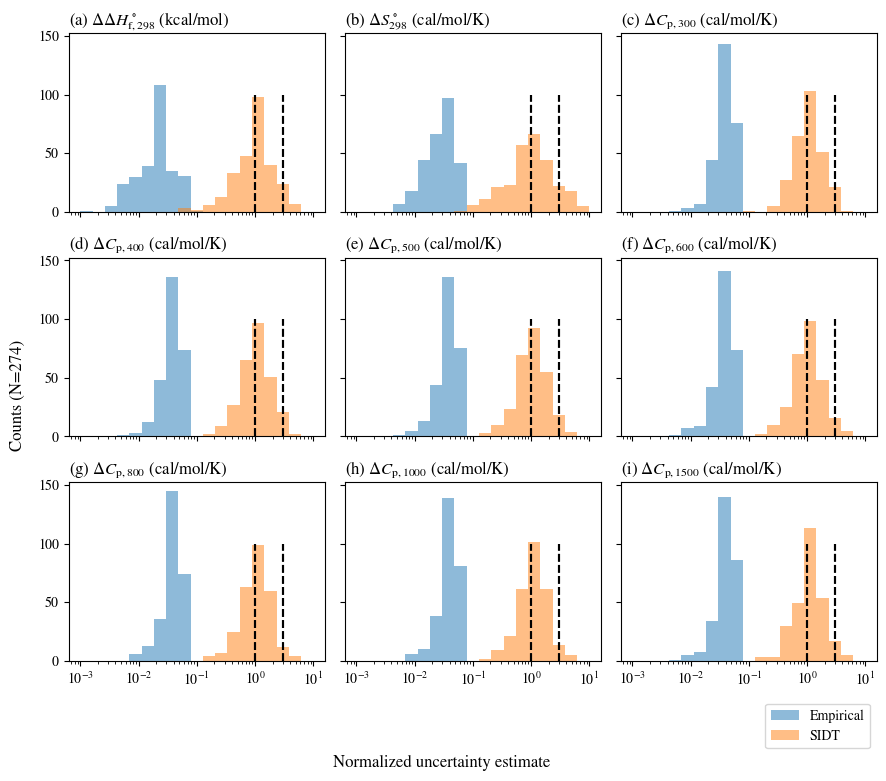

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, sharex=True, figsize=(9, 8))

colors = {
    "Empirical": plt.get_cmap("tab20")(0),
    "SIDT": plt.get_cmap("tab20")(2),
    "Finetuned empirical": plt.get_cmap("tab20")(1),
}
counter = 0

for df_i, (temp_df, df_label) in enumerate(zip([empirical_df, sidt_df], ["Empirical", "SIDT"])):
        
        ax = axs.flat[0]
        label = "HBI_H298 (kcal/mol)"
        true_ys = test_df[label].values
        data_uncs = test_df["unc_"+label].values
        pred_ys = temp_df[label].values
        pred_uncs = temp_df["unc_"+label].values
        true_errs = np.abs(pred_ys - true_ys)
        if df_label == "Empirical":
            pred_uncs[pred_uncs==0.0] = 0.1
        xs = pred_uncs / np.sqrt(true_errs**2 + data_uncs**2)
        # xs = pred_uncs / true_errs
        logbins = np.geomspace(1e-3, 1e1, 20)
        ax.hist(xs, bins=logbins, alpha=0.5, label=df_label)
        ax.vlines(x=3, ymin=0, ymax=100, linestyle="--", color="k")
        ax.vlines(x=1, ymin=0, ymax=100, linestyle="--", color="k")
        ax.set_xscale("log")
        ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

        ax = axs.flat[1]
        label = "HBI_Sint298 (cal/mol/K)"
        true_ys = test_df[label]
        data_uncs = test_df["unc_"+label].values
        pred_ys = temp_df[label]
        pred_uncs = temp_df["unc_"+label].values
        true_errs = np.abs(pred_ys - true_ys)
        if df_label == "Empirical":
            pred_uncs[pred_uncs==0.0] = 0.1
        xs = pred_uncs / np.sqrt(true_errs**2 + data_uncs**2)
        # xs = pred_uncs / true_errs
        logbins = np.geomspace(1e-3, 1e1, 20)
        ax.hist(xs, bins=logbins, alpha=0.5, label=df_label)
        ax.vlines(x=3, ymin=0, ymax=100, linestyle="--", color="k")
        ax.vlines(x=1, ymin=0, ymax=100, linestyle="--", color="k")
        ax.set_xscale("log")
        ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

        for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
            label = f"HBI_Cp{T} (cal/mol/K)"
            true_ys = test_df[label]
            data_uncs = test_df["unc_"+label].values
            pred_ys = temp_df[label]
            pred_uncs = temp_df["unc_"+label].values
            true_errs = np.abs(pred_ys - true_ys)
            if df_label == "Empirical":
                pred_uncs[pred_uncs==0.0] = 0.1
            xs = pred_uncs / np.sqrt(true_errs**2 + data_uncs**2)
            # xs = pred_uncs / true_errs
            logbins = np.geomspace(1e-3, 1e1, 20)
            ax.hist(xs, bins=logbins, alpha=0.5, label=df_label)
            ax.vlines(x=3, ymin=0, ymax=100, linestyle="--", color="k")
            ax.vlines(x=1, ymin=0, ymax=100, linestyle="--", color="k")
            ax.set_xscale("log")
            ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")
            
        counter += 1

axs.flat[-1].legend(bbox_to_anchor=(1.0, -0.2))
fig.supylabel("Counts "+f"(N={len(test_df.index)})")
fig.supxlabel("Normalized uncertainty estimate", y=0.03)
fig.tight_layout()

fig.savefig("../figures/unc_div_true_error_vs_true_error_sidt_vs_empirical.pdf", bbox_inches="tight")

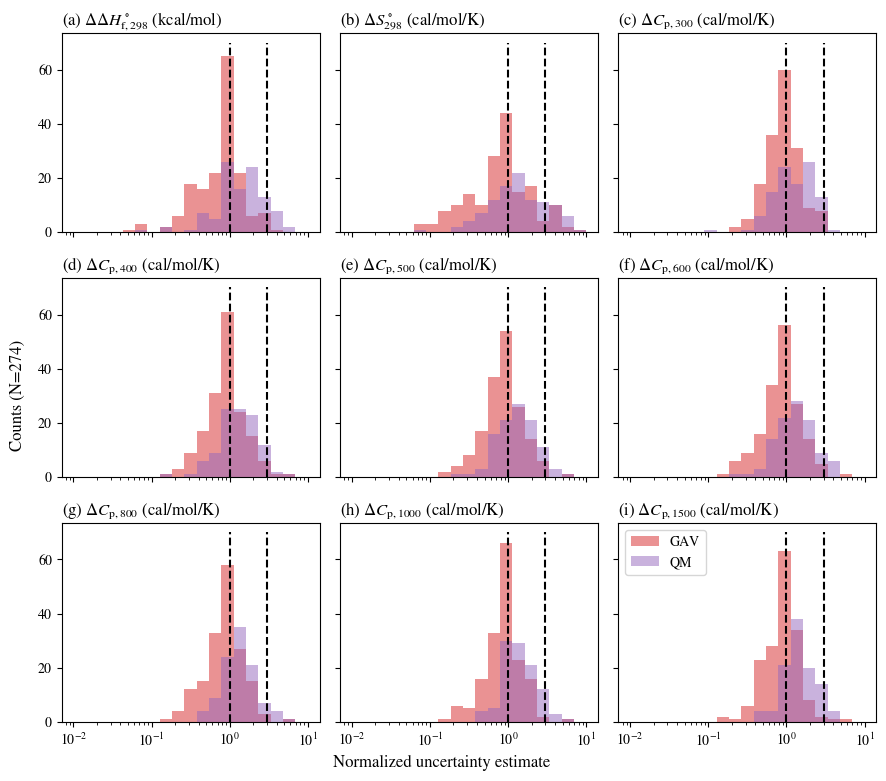

In [11]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, sharex=True, figsize=(9, 8))

colors = {
    "Empirical": plt.get_cmap("tab20")(0),
    "SIDT": plt.get_cmap("tab20")(2),
    "Finetuned empirical": plt.get_cmap("tab20")(1),
}
counter = 0

for df_i, (temp_df, df_label) in enumerate(zip([sidt_df], ["SIDT"])):
        
        ax = axs.flat[0]
        label = "HBI_H298 (kcal/mol)"
        true_ys = test_df[label].values
        data_uncs = test_df["unc_"+label].values
        pred_ys = temp_df[label].values
        pred_uncs = temp_df["unc_"+label].values
        true_errs = np.abs(pred_ys - true_ys)
        if df_label == "Empirical":
            pred_uncs[pred_uncs==0.0] = 0.1
        xs = pred_uncs / np.sqrt(true_errs**2 + data_uncs**2)
        # xs = pred_uncs / true_errs
        logbins = np.geomspace(1e-2, 1e1, 20)
        ax.hist(xs[test_df["closed_shell_thermo_source"]=="GAV"], bins=logbins, alpha=0.5, label="GAV", color="C3")
        ax.hist(xs[test_df["closed_shell_thermo_source"]!="GAV"], bins=logbins, alpha=0.5, label="QM", color="C4")
        ax.vlines(x=3, ymin=0, ymax=70, linestyle="--", color="k")
        ax.vlines(x=1, ymin=0, ymax=70, linestyle="--", color="k")
        ax.set_xscale("log")
        ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

        ax = axs.flat[1]
        label = "HBI_Sint298 (cal/mol/K)"
        true_ys = test_df[label]
        data_uncs = test_df["unc_"+label].values
        pred_ys = temp_df[label]
        pred_uncs = temp_df["unc_"+label].values
        true_errs = np.abs(pred_ys - true_ys)
        if df_label == "Empirical":
            pred_uncs[pred_uncs==0.0] = 0.1
        xs = pred_uncs / np.sqrt(true_errs**2 + data_uncs**2)
        # xs = pred_uncs / true_errs
        logbins = np.geomspace(1e-2, 1e1, 20)
        ax.hist(xs[test_df["closed_shell_thermo_source"]=="GAV"], bins=logbins, alpha=0.5, label="GAV", color="C3")
        ax.hist(xs[test_df["closed_shell_thermo_source"]!="GAV"], bins=logbins, alpha=0.5, label="QM", color="C4")
        ax.vlines(x=3, ymin=0, ymax=70, linestyle="--", color="k")
        ax.vlines(x=1, ymin=0, ymax=70, linestyle="--", color="k")
        ax.set_xscale("log")
        ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

        for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
            label = f"HBI_Cp{T} (cal/mol/K)"
            true_ys = test_df[label]
            data_uncs = test_df["unc_"+label].values
            pred_ys = temp_df[label]
            pred_uncs = temp_df["unc_"+label].values
            true_errs = np.abs(pred_ys - true_ys)
            if df_label == "Empirical":
                pred_uncs[pred_uncs==0.0] = 0.1
            xs = pred_uncs / np.sqrt(true_errs**2 + data_uncs**2)
            # xs = pred_uncs / true_errs
            logbins = np.geomspace(1e-2, 1e1, 20)
            ax.hist(xs[test_df["closed_shell_thermo_source"]=="GAV"], bins=logbins, alpha=0.5, label="GAV", color="C3")
            ax.hist(xs[test_df["closed_shell_thermo_source"]!="GAV"], bins=logbins, alpha=0.5, label="QM", color="C4")
            ax.vlines(x=3, ymin=0, ymax=70, linestyle="--", color="k")
            ax.vlines(x=1, ymin=0, ymax=70, linestyle="--", color="k")
            ax.set_xscale("log")
            ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")
            
        counter += 1

axs.flat[-1].legend()
fig.supylabel("Counts "+f"(N={len(test_df.index)})")
fig.supxlabel("Normalized uncertainty estimate", y=0.03)
fig.tight_layout()

fig.savefig("../figures/sidt_unc_est_dist_gav_vs_qm.pdf", bbox_inches="tight")

# Analyze outliers

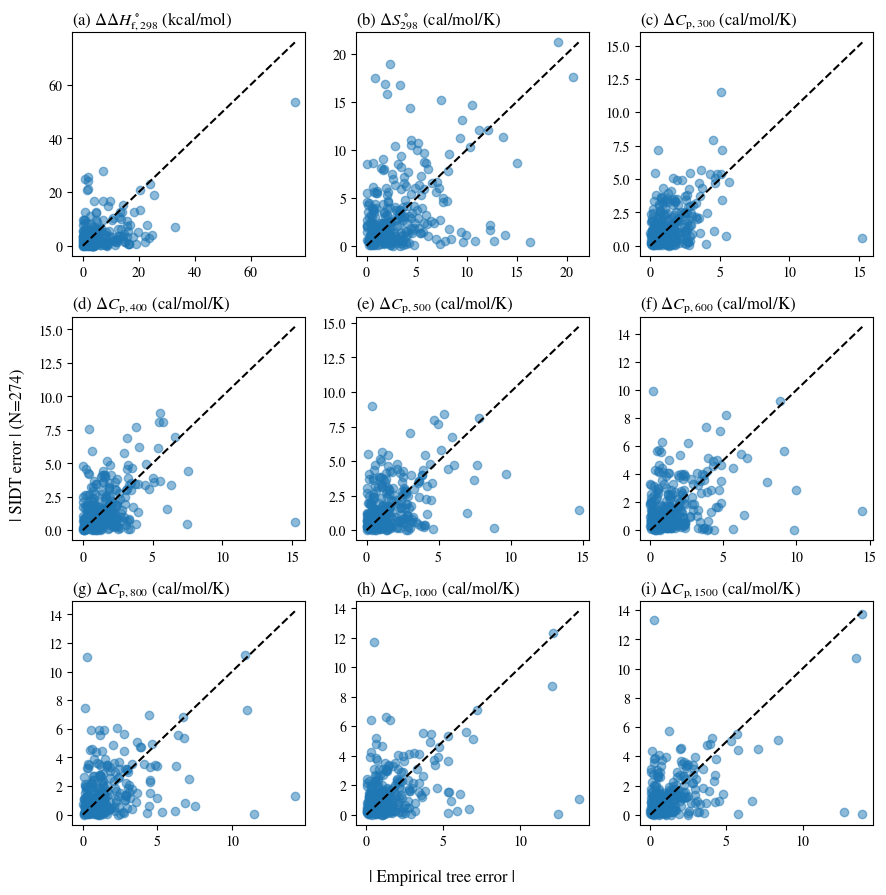

In [12]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
bins = 20

ax = axs.flat[0]
label = "HBI_H298 (kcal/mol)"
true_ys = test_df[label]
pred_ys = empirical_df[label]
empirical_errors = (pred_ys - true_ys).abs()

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = (pred_ys - true_ys).abs()

min_y = min(empirical_errors.min(), sidt_errors.min())
max_y = max(empirical_errors.max(), sidt_errors.max())
ax.scatter(empirical_errors, sidt_errors, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
label = "HBI_Sint298 (cal/mol/K)"
true_ys = test_df[label]
pred_ys = empirical_retrained_df[label]
empirical_errors = (pred_ys - true_ys).abs()

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = (pred_ys - true_ys).abs()

min_y = min(empirical_errors.min(), sidt_errors.min())
max_y = max(empirical_errors.max(), sidt_errors.max())
ax.scatter(empirical_errors, sidt_errors, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    label = f"HBI_Cp{T} (cal/mol/K)"
    true_ys = test_df[label]
    pred_ys = empirical_retrained_df[label]
    empirical_errors = (pred_ys - true_ys).abs()

    true_ys = test_df[label]
    pred_ys = sidt_df[label]
    sidt_errors = (pred_ys - true_ys).abs()

    min_y = min(empirical_errors.min(), sidt_errors.min())
    max_y = max(empirical_errors.max(), sidt_errors.max())
    ax.scatter(empirical_errors, sidt_errors, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel("| SIDT error |"+f" (N={len(test_df.index)})")
fig.supxlabel("| Empirical tree error |")

fig.tight_layout()
fig.savefig("../figures/empirical_error_vs_sidt_error_parity.pdf", bbox_inches="tight")

In [13]:
# label = "HBI_Sint298 (cal/mol/K)"
label = "HBI_H298 (kcal/mol)"
temp_df = empirical_df
true_ys = test_df[label]
pred_ys = temp_df[label]
errors = pred_ys - true_ys
temp_df["err"] = errors.abs()
temp_df = temp_df.sort_values("err", ascending=False)
temp_df[["resonance_radical_smiles", label, "err", "comment"]]

,resonance_radical_smiles,HBI_H298 (kcal/mol),err,comment
222,[O]C1=C=COO1,85.587954,75.804694,(C=COJ)
45,[O]C(O)=C=O,85.587954,32.857619,(C=COJ)
271,CC=C=C1[CH]C1,85.600000,25.345415,(Allyl_S)
93,C=CC=C([O])OC,85.587954,24.872993,(C=COJ)
102,C[CH]C(OO)OCOO,99.980000,23.853523,(CCJCOOH)
...,...,...,...,...
67,CC[C](C=O)CO,88.288719,0.045958,(CCJ(C)CO)
272,CC=[C]C1=CC1,99.800000,0.035190,(C=CJC=C)
190,[CH2]C(O)=CC=C,90.057361,0.028795,(C=C(O)CJ)
17,CC(=O)OC([O])CC1CO1,105.855641,0.014842,(CCOJ)


In [14]:
temp_df[temp_df["comment"]=="(C=COJ)"]

,resonance_radical_smiles,HBI_H298 (kcal/mol),unc_HBI_H298 (kcal/mol),HBI_Sint298 (cal/mol/K),unc_HBI_Sint298 (cal/mol/K),HBI_Cp300 (cal/mol/K),unc_HBI_Cp300 (cal/mol/K),HBI_Cp400 (cal/mol/K),unc_HBI_Cp400 (cal/mol/K),HBI_Cp500 (cal/mol/K),...,HBI_Cp600 (cal/mol/K),unc_HBI_Cp600 (cal/mol/K),HBI_Cp800 (cal/mol/K),unc_HBI_Cp800 (cal/mol/K),HBI_Cp1000 (cal/mol/K),unc_HBI_Cp1000 (cal/mol/K),HBI_Cp1500 (cal/mol/K),unc_HBI_Cp1500 (cal/mol/K),comment,err
222,[O]C1=C=COO1,85.587954,0.1,0.788719,0.1,-2.413958,0.1,-3.226577,0.1,-3.489484,...,-3.489484,0.1,-3.417782,0.1,-3.465583,0.1,-3.824092,0.1,(C=COJ),75.804694
45,[O]C(O)=C=O,85.587954,0.1,0.788719,0.1,-2.413958,0.1,-3.226577,0.1,-3.489484,...,-3.489484,0.1,-3.417782,0.1,-3.465583,0.1,-3.824092,0.1,(C=COJ),32.857619
93,C=CC=C([O])OC,85.587954,0.1,0.788719,0.1,-2.413958,0.1,-3.226577,0.1,-3.489484,...,-3.489484,0.1,-3.417782,0.1,-3.465583,0.1,-3.824092,0.1,(C=COJ),24.872993
197,COC=C=C[O],85.587954,0.1,0.788719,0.1,-2.413958,0.1,-3.226577,0.1,-3.489484,...,-3.489484,0.1,-3.417782,0.1,-3.465583,0.1,-3.824092,0.1,(C=COJ),20.393157
39,C=C([O])OCCOO,85.587954,0.1,0.788719,0.1,-2.413958,0.1,-3.226577,0.1,-3.489484,...,-3.489484,0.1,-3.417782,0.1,-3.465583,0.1,-3.824092,0.1,(C=COJ),19.831680
55,CC=C([O])O,85.587954,0.1,0.788719,0.1,-2.413958,0.1,-3.226577,0.1,-3.489484,...,-3.489484,0.1,-3.417782,0.1,-3.465583,0.1,-3.824092,0.1,(C=COJ),19.133713
57,[O]C1=C(O)COO1,85.587954,0.1,0.788719,0.1,-2.413958,0.1,-3.226577,0.1,-3.489484,...,-3.489484,0.1,-3.417782,0.1,-3.465583,0.1,-3.824092,0.1,(C=COJ),16.728372
122,C=CCOC(=C)[O],85.587954,0.1,0.788719,0.1,-2.413958,0.1,-3.226577,0.1,-3.489484,...,-3.489484,0.1,-3.417782,0.1,-3.465583,0.1,-3.824092,0.1,(C=COJ),16.368612
21,C=C([O])OC(OO)C(C)C,85.587954,0.1,0.788719,0.1,-2.413958,0.1,-3.226577,0.1,-3.489484,...,-3.489484,0.1,-3.417782,0.1,-3.465583,0.1,-3.824092,0.1,(C=COJ),16.198490
73,C=C([O])O,85.587954,0.1,0.788719,0.1,-2.413958,0.1,-3.226577,0.1,-3.489484,...,-3.489484,0.1,-3.417782,0.1,-3.465583,0.1,-3.824092,0.1,(C=COJ),13.632027


In [15]:
temp_df = sidt_df
true_ys = test_df[label]
pred_ys = temp_df[label]
errors = pred_ys - true_ys
temp_df["err"] = errors.abs()
temp_df = temp_df.sort_values("err", ascending=False)
temp_df

,resonance_radical_smiles,HBI_H298 (kcal/mol),unc_HBI_H298 (kcal/mol),HBI_Sint298 (cal/mol/K),unc_HBI_Sint298 (cal/mol/K),HBI_Cp300 (cal/mol/K),unc_HBI_Cp300 (cal/mol/K),HBI_Cp400 (cal/mol/K),unc_HBI_Cp400 (cal/mol/K),HBI_Cp500 (cal/mol/K),...,HBI_Cp600 (cal/mol/K),unc_HBI_Cp600 (cal/mol/K),HBI_Cp800 (cal/mol/K),unc_HBI_Cp800 (cal/mol/K),HBI_Cp1000 (cal/mol/K),unc_HBI_Cp1000 (cal/mol/K),HBI_Cp1500 (cal/mol/K),unc_HBI_Cp1500 (cal/mol/K),comment,err
222,[O]C1=C=COO1,63.5355,4.17612,18.245300,2.23607,-1.325010,2.23607,-0.930301,2.23607,-0.185875,...,0.194647,2.23607,0.797263,2.23607,1.30640,2.23607,1.02193,2.23607,(RJ1_N-1R-inRing_N-1R->C_Ext-1NO-R_2R!H->C_Ext...,53.752240
116,[O]C1=COC1OO,64.4526,1.69706,-2.458030,1.41421,-2.511190,1.41421,-2.086360,1.41421,-1.951250,...,-2.106920,1.41421,-2.469810,1.41421,-2.81644,1.41421,-3.54216,1.41421,(RJ1_N-1R-inRing_N-1R->C_Ext-1NO-R_2R!H->C_Ext...,27.692150
235,[CH]1C2CC=CC1OOC2,72.6006,4.17612,-9.372910,2.23607,-1.984120,2.23607,-2.069310,2.23607,-2.645830,...,-2.014860,2.23607,-1.566650,2.23607,-2.13016,2.23607,-2.63919,2.23607,(RJ1_1R-inRing_Ext-1R-R_Ext-2R!H-R_N-Sp-3R!H=2...,25.468592
53,[CH2]CC(OO)OCOO,126.8990,1.56205,20.270800,1.41421,6.503800,1.41421,2.409400,1.41421,-0.850670,...,-3.020500,1.41421,-5.983160,1.41421,-7.63273,1.41421,-8.61705,1.41421,(RJ1_N-1R-inRing_1R->C_Ext-1C-R_Sp-2R!H-1C_2R!...,24.856954
18,CC(=O)OC1OOCC1O[O],114.0120,10.14920,-0.052644,4.85276,0.425154,3.65964,-3.799880,3.38160,-6.286050,...,-7.341670,3.28787,-8.576990,3.28199,-9.58310,3.21773,-9.72241,3.21321,(RJ1_N-1R-inRing_N-1R->C_Ext-1NO-R_N-2R!H->C_N...,24.118518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,C=CCC([O])=O,109.6270,5.93004,0.229889,4.83502,-2.871870,3.33753,-3.484530,3.35621,-3.960400,...,-4.306480,3.27200,-4.762550,3.22071,-5.10843,3.19442,-5.81463,3.17666,(RJ1_N-1R-inRing_N-1R->C_Ext-1NO-R_2R!H->C_Ext...,0.018640
38,[CH2]C(=O)OCCOO,99.5609,1.73391,-0.597863,2.30649,1.123630,1.74472,0.841971,2.50915,0.314649,...,-0.331576,3.15372,-1.647660,2.42186,-2.43136,1.87557,-3.86077,1.67267,(RJ1_N-1R-inRing_1R->C_Ext-1C-R_Sp-2R!H-1C_2R!...,0.013691
80,[CH2]C(=O)OC,99.3697,3.33683,-2.503250,7.23237,1.337590,2.63746,1.011510,2.63393,0.440757,...,-0.111686,2.62162,-1.091530,2.63310,-1.94189,2.40470,-3.56785,1.95125,(RJ1_N-1R-inRing_1R->C_Ext-1C-R_Sp-2R!H-1C_2R!...,0.007931
72,[CH2]C(=O)O,99.3935,3.24360,-2.449190,7.06288,1.311510,2.58036,1.007920,2.56643,0.439492,...,-0.118536,2.55497,-1.089200,2.56550,-1.93019,2.34528,-3.56062,1.90229,(RJ1_N-1R-inRing_1R->C_Ext-1C-R_Sp-2R!H-1C_2R!...,0.004772


In [16]:
temp_df.columns

Index(['resonance_radical_smiles', 'HBI_H298 (kcal/mol)',
       'unc_HBI_H298 (kcal/mol)', 'HBI_Sint298 (cal/mol/K)',
       'unc_HBI_Sint298 (cal/mol/K)', 'HBI_Cp300 (cal/mol/K)',
       'unc_HBI_Cp300 (cal/mol/K)', 'HBI_Cp400 (cal/mol/K)',
       'unc_HBI_Cp400 (cal/mol/K)', 'HBI_Cp500 (cal/mol/K)',
       'unc_HBI_Cp500 (cal/mol/K)', 'HBI_Cp600 (cal/mol/K)',
       'unc_HBI_Cp600 (cal/mol/K)', 'HBI_Cp800 (cal/mol/K)',
       'unc_HBI_Cp800 (cal/mol/K)', 'HBI_Cp1000 (cal/mol/K)',
       'unc_HBI_Cp1000 (cal/mol/K)', 'HBI_Cp1500 (cal/mol/K)',
       'unc_HBI_Cp1500 (cal/mol/K)', 'comment', 'err'],
      dtype='object')

# Plot: parity plot

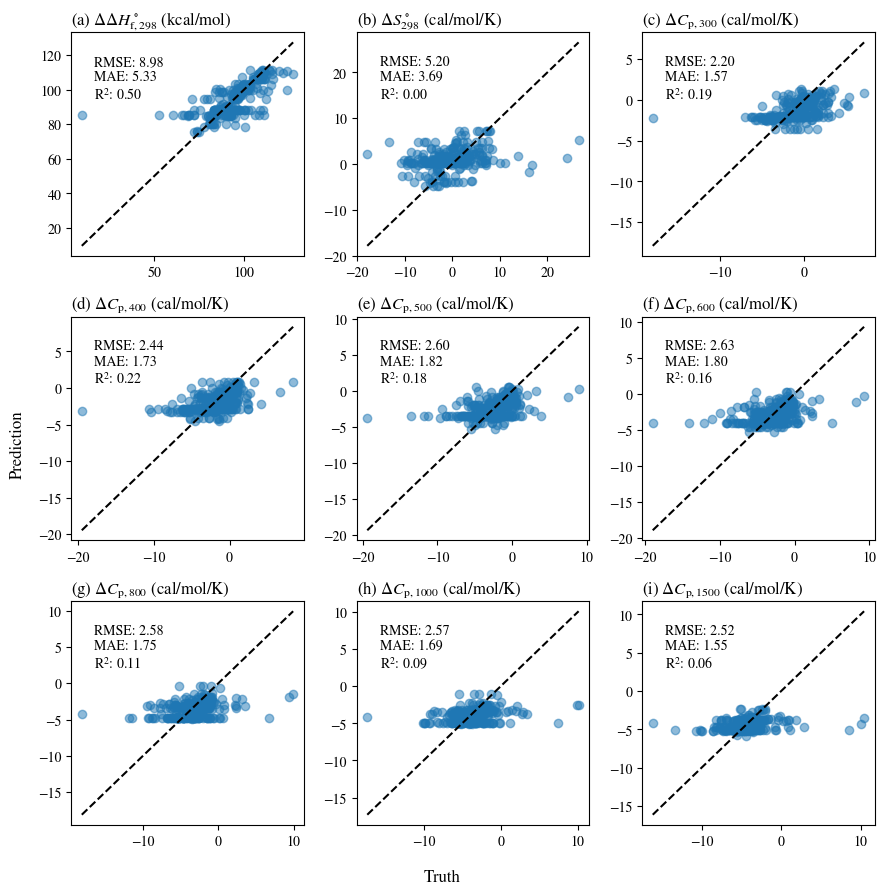

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_df["HBI_H298 (kcal/mol)"]
pred_ys = empirical_df["HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
pred_ys = empirical_df["HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
    pred_ys = empirical_df[f"HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/empirical_parity.pdf", bbox_inches="tight")

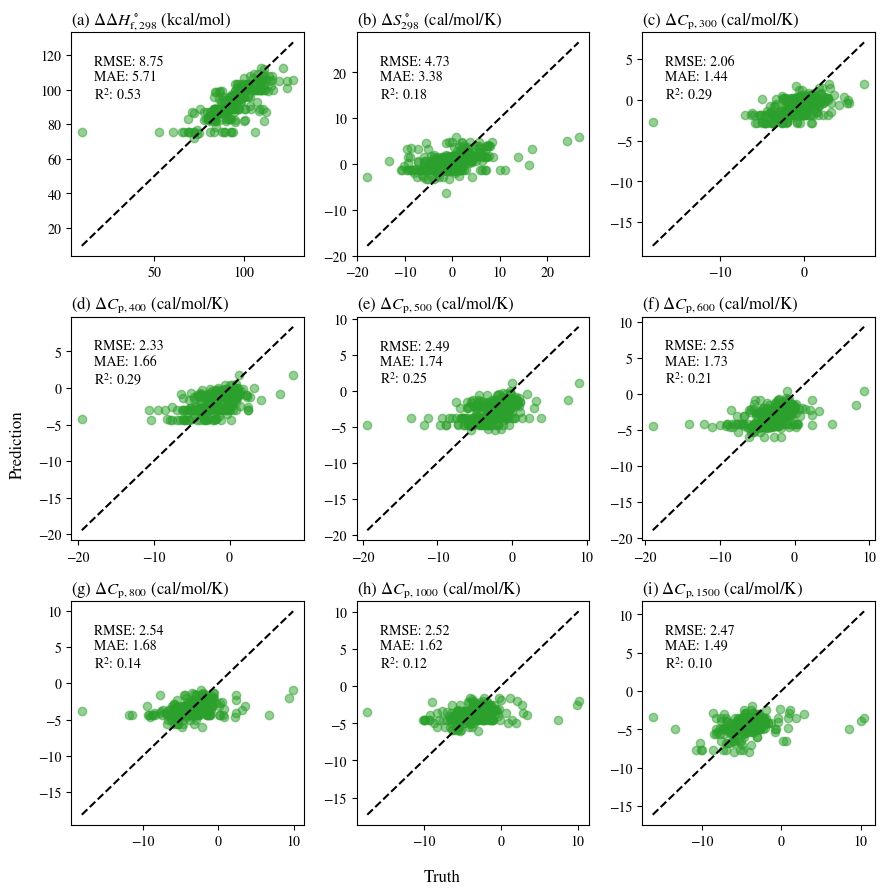

In [18]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_df["HBI_H298 (kcal/mol)"]
pred_ys = empirical_retrained_df["HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5, color="C2")
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
pred_ys = empirical_retrained_df["HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5, color="C2")
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
    pred_ys = empirical_retrained_df[f"HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5, color="C2")
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/empirical_retrained_parity.pdf", bbox_inches="tight")

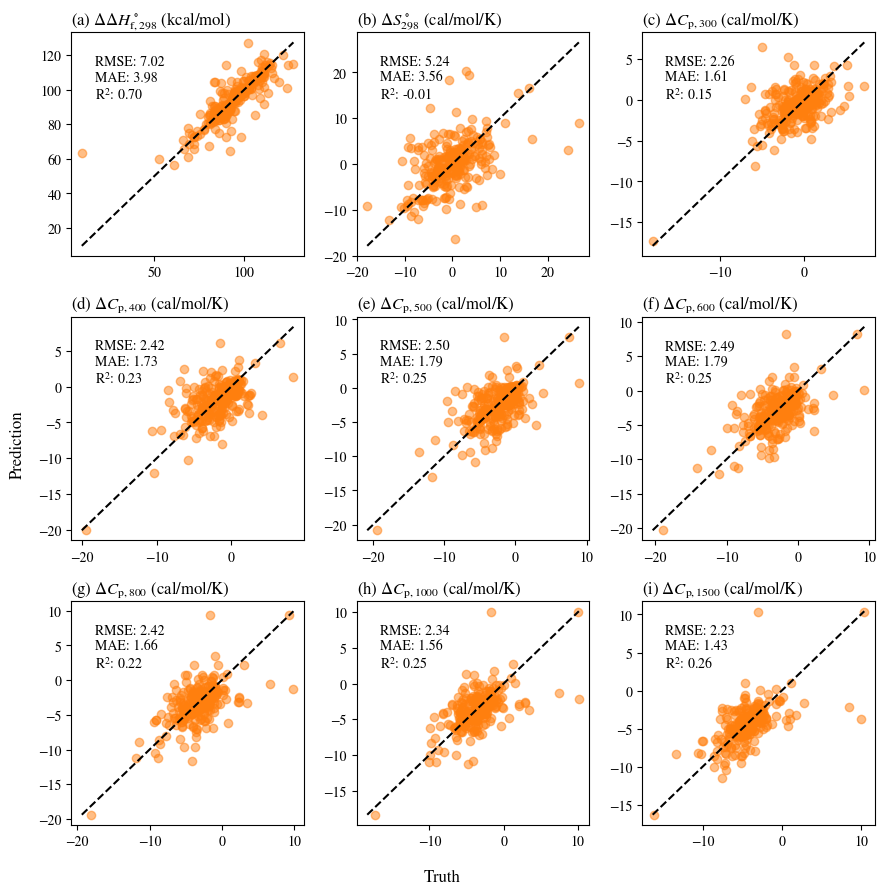

In [19]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_df["HBI_H298 (kcal/mol)"]
pred_ys = sidt_df["HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5, color="C1")
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
pred_ys = sidt_df["HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5, color="C1")
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
    pred_ys = sidt_df[f"HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5, color="C1")
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/sidt_parity.pdf", bbox_inches="tight")

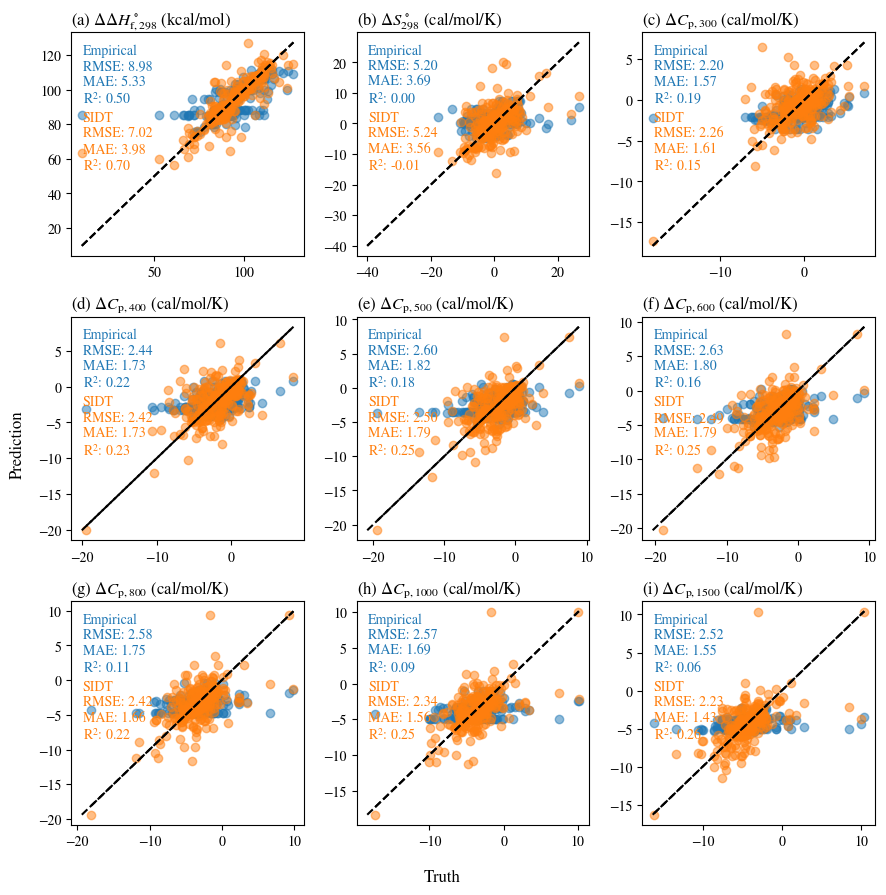

In [20]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))

for df_i, (temp_df, df_label) in enumerate(zip([empirical_df, sidt_df, ], ["Empirical", "SIDT",])):

    ax = axs.flat[0]
    true_ys = test_df["HBI_H298 (kcal/mol)"]
    pred_ys = temp_df["HBI_H298 (kcal/mol)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5, label=df_label, color=colors[df_label])
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.05, 0.95-0.3*df_i, f"""{df_label}
RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes, color=colors[df_label])
    ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

    ax = axs.flat[1]
    true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
    pred_ys = temp_df["HBI_Sint298 (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5, label=df_label, color=colors[df_label])
    ax.plot([-40, max_y], [-40, max_y], "k--")
    ax.text(0.05, 0.95-0.3*df_i, f"""{df_label}
RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes, color=colors[df_label])
    ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

    for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
        true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
        pred_ys = temp_df[f"HBI_Cp{T} (cal/mol/K)"]
        min_y = min(true_ys.min(), pred_ys.min())
        max_y = max(true_ys.max(), pred_ys.max())
        rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
        mae = mean_absolute_error(true_ys, pred_ys)
        r2 = r2_score(true_ys, pred_ys)
        ax.scatter(true_ys, pred_ys, alpha=0.5, label=df_label, color=colors[df_label])
        ax.plot([min_y, max_y], [min_y, max_y], "k--")
        ax.text(0.05, 0.95-0.3*df_i, f"""{df_label}
RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes, color=colors[df_label])
        ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

# axs.flat[-1].legend()
fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
# fig.savefig("../figures/sidt_empirical_parity.pdf", bbox_inches="tight")

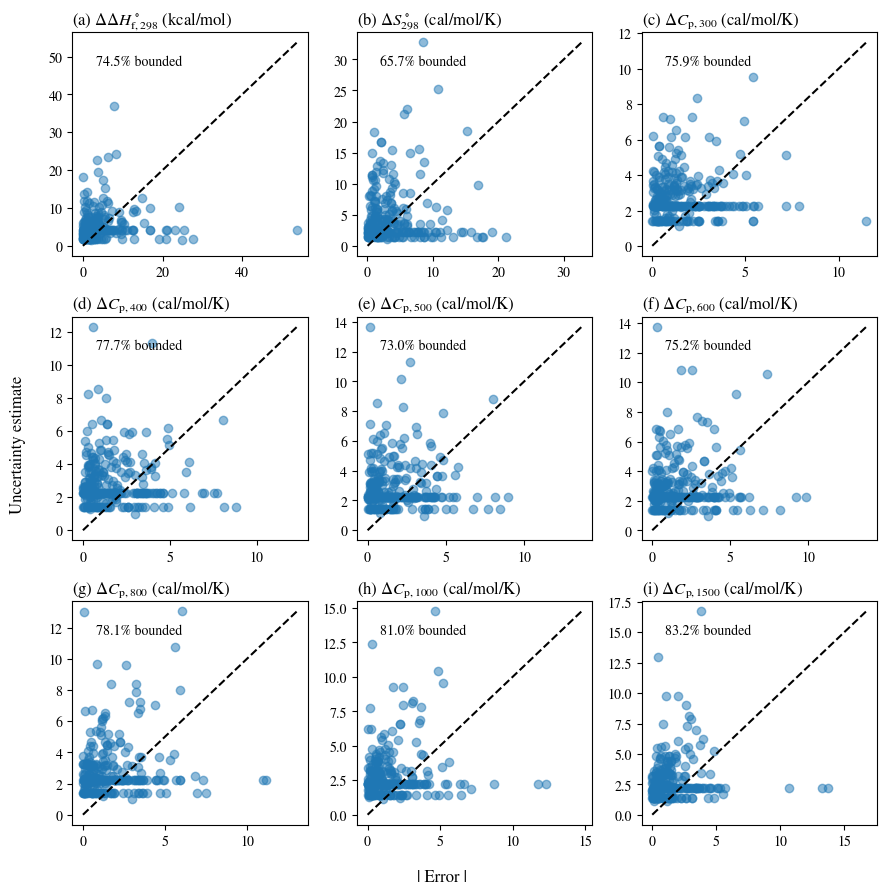

In [21]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = (sidt_df["HBI_H298 (kcal/mol)"] - test_df["HBI_H298 (kcal/mol)"]).abs()
pred_ys = sidt_df["unc_HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")
# ax.set_yscale("log")
# ax.set_xscale("log")

ax = axs.flat[1]
true_ys = (sidt_df["HBI_Sint298 (cal/mol/K)"] - test_df["HBI_Sint298 (cal/mol/K)"]).abs()
pred_ys = sidt_df["unc_HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")
# ax.set_yscale("log")
# ax.set_xscale("log")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = (sidt_df[f"HBI_Cp{T} (cal/mol/K)"] - test_df[f"HBI_Cp{T} (cal/mol/K)"]).abs()
    pred_ys = sidt_df[f"unc_HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
    ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")
    # ax.set_yscale("log")
    # ax.set_xscale("log")

fig.supylabel(f"Uncertainty estimate")
fig.supxlabel(f"| Error |")

fig.tight_layout()
fig.savefig("../figures/sidt_unc_vs_true_error_parity.pdf", bbox_inches="tight")